In [1]:
import pandas as pd
import numpy as np
import utils.constants as const

from sklearn.metrics import confusion_matrix
from utils.data_split import get_species_map
from utils.graph import draw_confusion_matrix

In [2]:
ae_species_list = [
    'Aedes Albopictus',
    'Aedes Cinereus',
    'Aedes Communis',
    'Aedes Punctor',
    'Aedes Rusticus',
    'Aedes Sticticus',
    'Aedes Vexans',
]

In [3]:
open_species_list = get_species_map().values()
open_species_list = [w.replace('_', ' ') for w in open_species_list]
open_species_list = [w.replace('Ae', 'Aedes') for w in open_species_list]
open_species_list = [w.replace('An', 'Anopheles') for w in open_species_list]
open_species_list = [w.replace('Cq', 'Coquillettidia') for w in open_species_list]
open_species_list = [w.replace('Cx', 'Culex') for w in open_species_list]
open_species_list = [w.title() for w in open_species_list]
open_species_list = [w.replace('Sl', 's.l.') for w in open_species_list]

In [4]:
full_species_list = open_species_list[:-1]

In [5]:
ae_pred = pd.read_csv('results/closed/aedes_only/prediction.csv')
full_pred = pd.read_csv('results/closed/full/prediction.csv')
open_pred = pd.read_csv('results/open/prediction.csv')

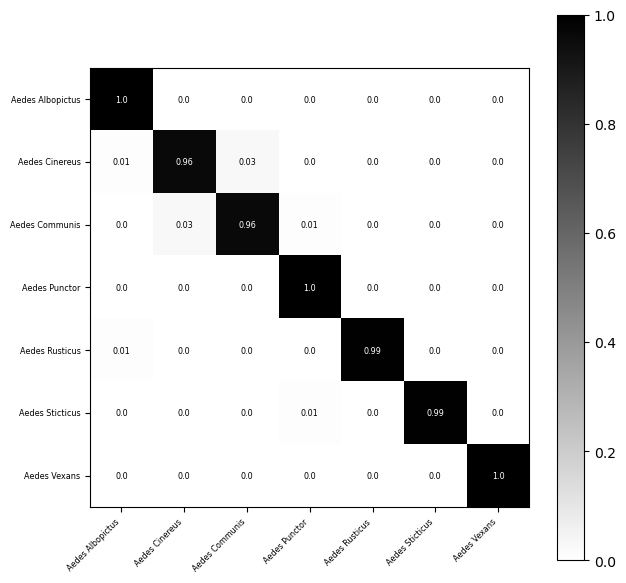

In [6]:
ae_cm = confusion_matrix(ae_pred['y_true'], ae_pred['y_pred'], normalize='true')
ae_cm = np.round(ae_cm, 2)
draw_confusion_matrix(ae_cm, ae_species_list, 'closed/aedes_only', 'avg')

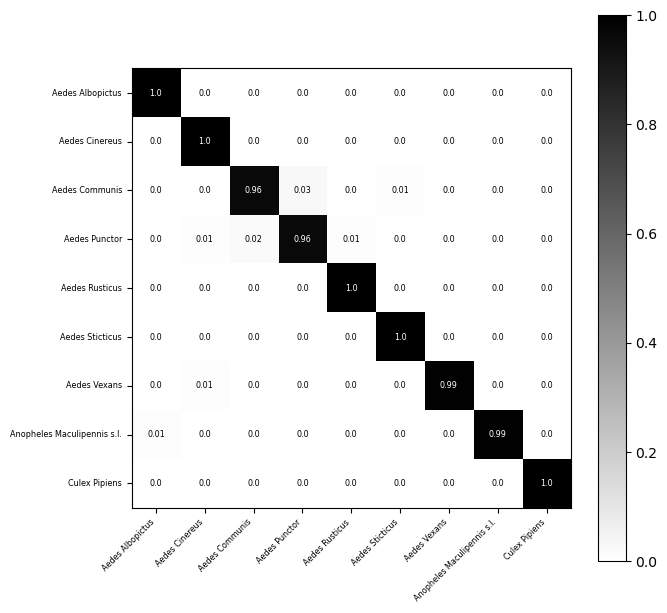

In [7]:
full_cm = confusion_matrix(full_pred['y_true'], full_pred['y_pred'], normalize='true')
full_cm = np.round(full_cm, 2)
draw_confusion_matrix(full_cm, full_species_list, 'closed/full', 'avg')

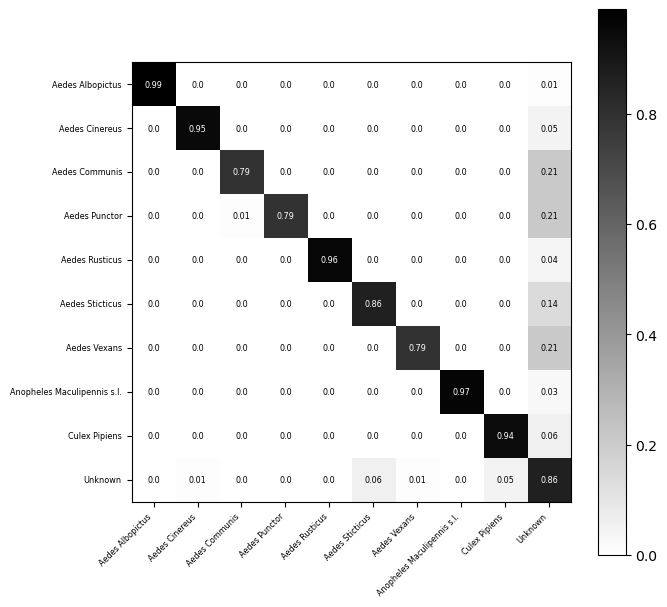

In [8]:
open_cm = confusion_matrix(open_pred['y_true'], open_pred['y_pred'], normalize='true')
open_cm = np.round(open_cm, 2)
draw_confusion_matrix(open_cm, open_species_list, 'open', 'avg')